
Imported Dependencies for Analysis


In [68]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Load the csv file and show top 5 records from it

In [ ]:
df = pd.read_csv('/content/charcters_stats.csv')
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


Data Cleaning Before Analysis: Drop Nulls, Duplicates,etc. Did not drop useless columns.

In [ ]:
#returns number of duplicate values in dataframe
df.duplicated().sum()

0

Checking for null values in dataset

In [ ]:
df.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

Three null values found in Alignment column will replace with "unknown"

In [ ]:
#filled NaN values with "unknown"
df.fillna('unknown',inplace=True)

In [ ]:
df.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

No changes made to column names.

Save cleaned Dataset to csv file

In [ ]:
df.to_csv('character_stats_cleaned.csv')

Show number of rows and columns

In [ ]:
# shape of dataset structure to double check calculations
df.shape

(611, 9)

In [ ]:
print("Number of Columns in Dataset: ", len(df.columns))
print("Number of Rows in Dataset: ", len(df.index))

Number of Columns in Dataset:  9
Number of Rows in Dataset:  611


You need to find the values of alignment ,can use value_counts()

In [ ]:
df[['Alignment']].value_counts()

Alignment
good         432
bad          165
neutral       11
unknown        3
dtype: int64

In [ ]:
num_good_evil = df.groupby('Alignment').count()[['Name']].reset_index()
num_good_evil.rename(columns={'Name': 'Alignment_Count'}, inplace=True)
num_good_evil

,Alignment,Alignment_Count
0,bad,165
1,good,432
2,neutral,11
3,unknown,3


Find out only good alignment holders superheroes


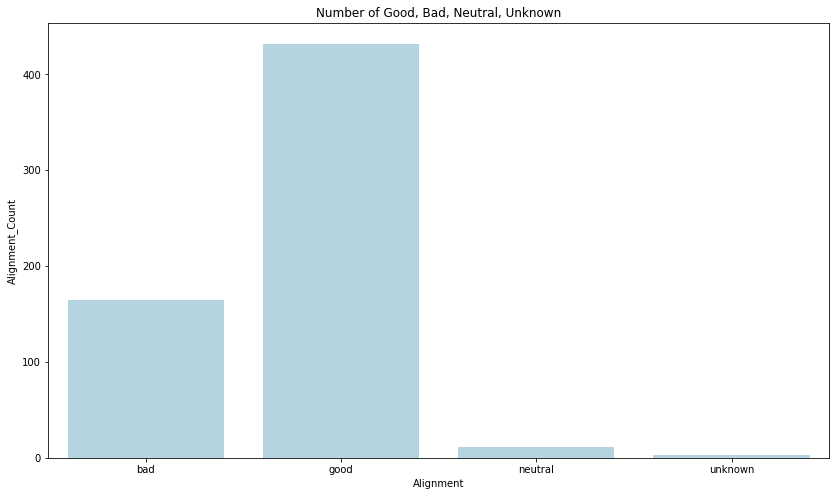

In [ ]:
# create variables for data
x = num_good_evil['Alignment']
y = num_good_evil['Alignment_Count']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='lightblue').set(title="Number of Good, Bad, Neutral, Unknown")

There are only 3 super powered poeple with unknown alignment.

In [ ]:
df.loc[df['Alignment'] == 'good'][['Name', 'Alignment']]

,Name,Alignment
0,3-D Man,good
1,A-Bomb,good
2,Abe Sapien,good
3,Abin Sur,good
6,Adam Monroe,good
...,...,...
604,X-Man,good
606,Yellowjacket,good
607,Yellowjacket II,good
608,Ymir,good


In [ ]:
df.loc[df['Alignment'] == 'good'][['Name', 'Alignment']].count()

Name         432
Alignment    432
dtype: int64

Show first five records which you found in point 6

In [ ]:
#returns top 5 record/rows for characters with good alignment
df.loc[df['Alignment'] == 'good'].head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


Show top five records having top speed of heroes of good alignment

In [ ]:
good_and_fast_characters = df.loc[df['Alignment'] == 'good'].reset_index()
good_and_fast_characters.nlargest(5, 'Speed')

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
63,85,Black Bolt,good,75,67,100,84,100,56,482
160,229,Flash I,good,63,10,100,50,57,32,312
161,230,Flash II,good,63,10,100,60,66,32,331
162,231,Flash III,good,63,10,100,60,83,32,348
163,232,Flash IV,good,63,10,100,32,59,48,312


Show 5 records of super heroes who have maximum power of good alignment

In [ ]:
good_and_max_pow_characters = df.loc[df['Alignment'] == 'good'].reset_index()
good_and_max_pow_characters.nlargest(5, 'Power')

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
54,69,Beta Ray Bill,good,63,80,35,95,100,84,457
55,70,Beyonder,good,88,100,23,100,100,56,467
63,85,Black Bolt,good,75,67,100,84,100,56,482
94,129,Cable,good,88,48,23,56,100,80,395
136,185,Deadman,good,50,10,33,100,100,42,335


. Find out how many super heroes are there with power 100 of good alignment

In [ ]:
good_and_100_pow = df.loc[(df['Alignment'] == 'good') & (df['Power'] == 100)].reset_index()
print("There are this many super heroes with Power 100: ", good_and_100_pow['Name'].count())

There are this many super heroes with Power 100:  33


Shape them what you got in point 10


In [ ]:
print("The shape of the dataset I made for point 10 is: ", good_and_100_pow.shape)

The shape of the dataset I made for point 10 is:  (33, 10)


Show all records from point 10

In [ ]:
#A function set_option() is provided by pandas to display all rows of the data frame. display. 
#max_rows represents the maximum number of rows that pandas will display while displaying a data frame. 
#The default value of max_rows is 10.
pd.set_option('display.max_rows', None)
good_and_100_pow

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,69,Beta Ray Bill,good,63,80,35,95,100,84,457
1,70,Beyonder,good,88,100,23,100,100,56,467
2,85,Black Bolt,good,75,67,100,84,100,56,482
3,129,Cable,good,88,48,23,56,100,80,395
4,185,Deadman,good,50,10,33,100,100,42,335
5,196,Doctor Fate,good,81,16,25,80,100,50,352
6,198,Doctor Strange,good,100,10,12,84,100,60,366
7,204,Dr Manhattan,good,88,32,42,95,100,42,399
8,226,Firestorm,good,50,53,58,56,100,42,359
9,251,Goku,good,56,100,75,90,100,100,521


Retrieve total of first five records of max power of good alignment super heroes

In [ ]:
# nlarget() will return the top 5 largest values same as  max
#convert first five largest/max rows to list, then add together
temp_list = list(good_and_max_pow_characters['Power'].nlargest(n=5))
print("Total of first five records of max power of good alignment super heroes: ", sum(temp_list))

Total of first five records of max power of good alignment super heroes:  500


Not sure what you meant by this one.

In [ ]:
# head() returns first five rows
#convert first five largest/max rows to list, then add together
temp_list = list(good_and_max_pow_characters['Power'].head())
print("Total of first five records of max power of good alignment super heroes: ", sum(temp_list))

Total of first five records of max power of good alignment super heroes:  232


. Draw a bar plot of all super heroes who are having good alignment and max power of
top five only , take same object of point 13 , show name and total in plot with green
bars


Sort of confused by meaning of max power, so included a wide range of graphs hoping it meets the requirements. 

In [ ]:
#max value is 100 for power column
df['Power'].max()

100

[Text(0.5, 1.0, 'First Five Good Characters by Max power')]

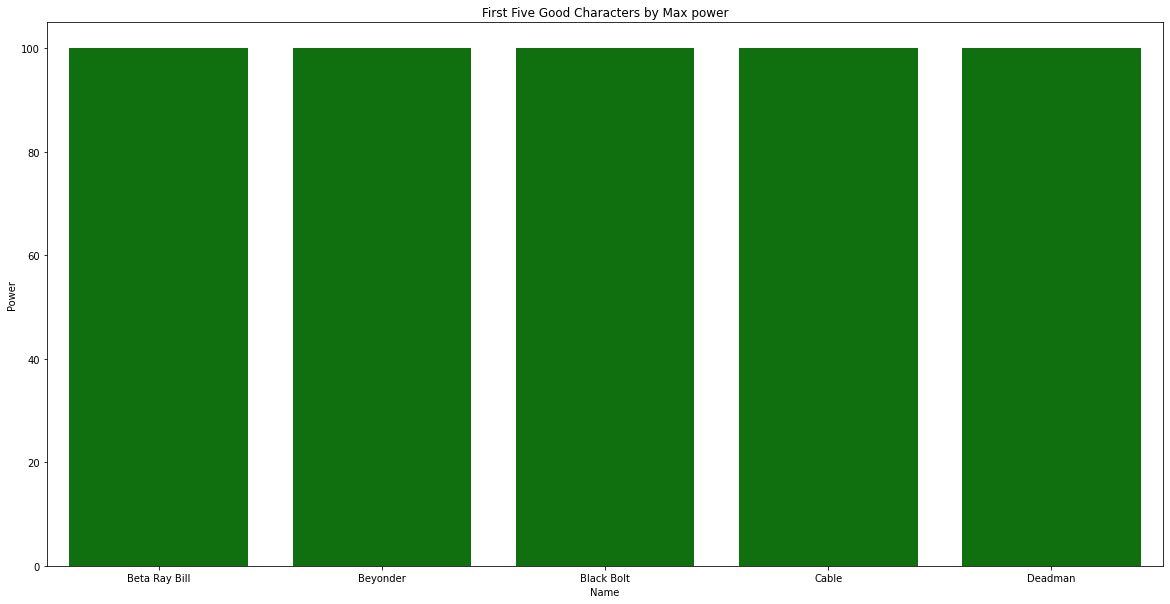

In [ ]:
#create dataframe with character whom only have good alignment and max value of 100(highest value in power column)
max_pow_good_align = df[(df['Alignment'] == 'good') & (df['Power'] == 100)].reset_index()

x = max_pow_good_align['Name'].head()
y = max_pow_good_align['Power'].head()
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = good_and_max_pow_characters, color='green').set(title="First Five Good Characters by Max power")

[Text(0.5, 1.0, 'First Good Five Characters by power')]

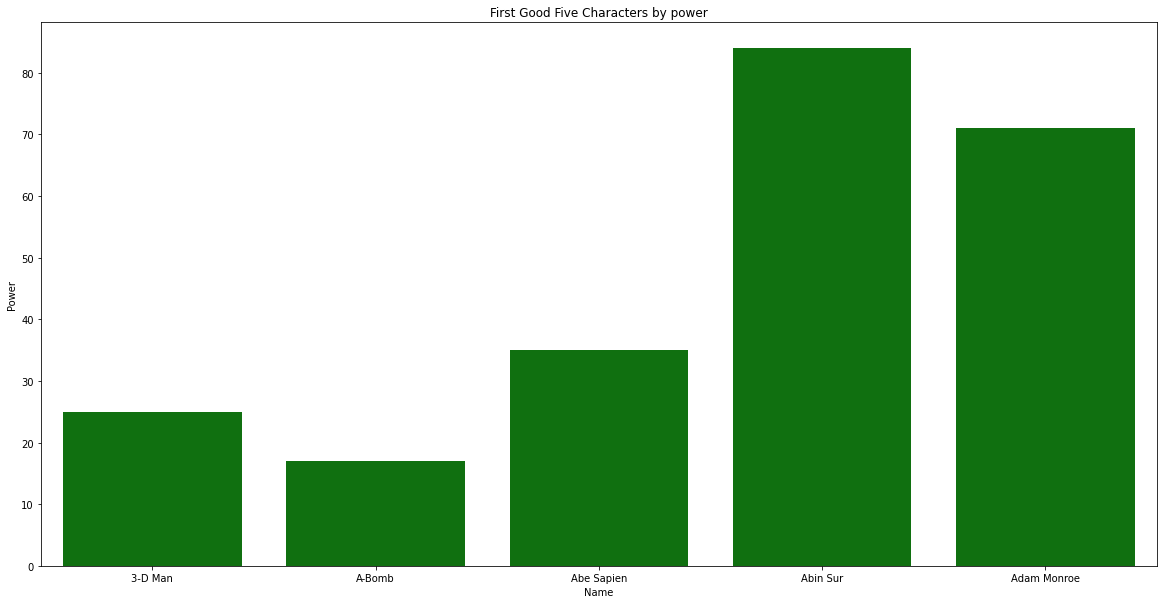

In [ ]:
#create first five characters of only good alignment for barplot
only_good_characters = df.loc[df['Alignment'] == 'good'].head().reset_index()
only_good_characters

x = only_good_characters['Name']
y = only_good_characters['Power']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = good_and_max_pow_characters, color='green').set(title="First Good Five Characters by power")

[Text(0.5, 1.0, 'First Good Five Characters by Total ')]

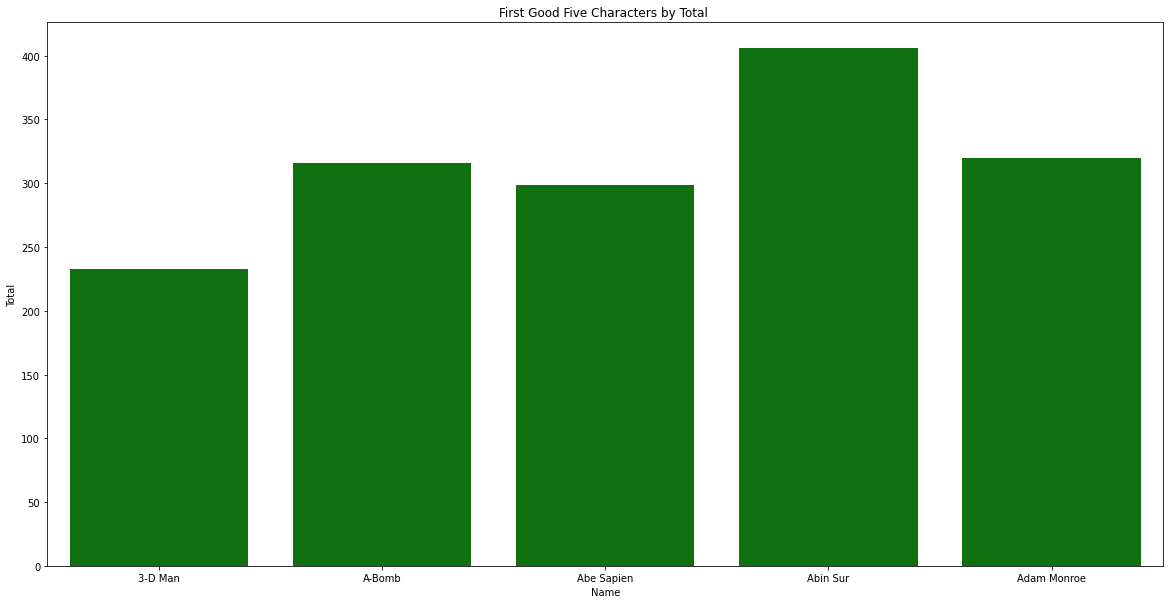

In [ ]:
only_good_characters = df.loc[df['Alignment'] == 'good'].head().reset_index()
only_good_characters

x = only_good_characters['Name']
y = only_good_characters['Total']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = good_and_max_pow_characters, color='green').set(title="First Good Five Characters by Total ")

. Extract villains having bad alignment

In [ ]:
#created dataframe having only bad alignment
characters_bad_alignment = df.loc[df['Alignment'] == 'bad'].reset_index()


Show first five records of point 15

In [ ]:
characters_bad_alignment.head()

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,4,Abomination,bad,63,80,53,90,55,95,436
1,5,Abraxas,bad,88,100,83,99,100,56,526
2,11,Air-Walker,bad,50,85,100,85,100,40,460
3,16,Amazo,bad,75,100,100,100,100,100,575
4,17,Ammo,bad,1,1,1,1,0,1,5


Show top five fastest super villains in terms of super speed

In [ ]:
#nlargest returns 5 rows with largest values in speed column
characters_bad_alignment.nlargest(5, 'Speed')

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
2,11,Air-Walker,bad,50,85,100,85,100,40,460
3,16,Amazo,bad,75,100,100,100,100,100,575
144,535,Superboy-Prime,bad,94,100,100,100,100,85,579
164,610,Zoom,bad,50,10,100,28,72,28,288
65,242,General Zod,bad,94,100,96,100,94,95,579


Top five super villains in terms of intelligence

In [ ]:
#nlargest returns 5 rows with largest values in Intelligence column
characters_bad_alignment.nlargest(5, 'Intelligence')

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
106,386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
9,29,Apocalypse,bad,100,100,33,100,100,60,493
30,122,Brainiac,bad,100,28,63,90,60,75,416
49,194,Doctor Doom,bad,100,32,20,100,93,84,429
78,315,Joker,bad,100,10,12,56,22,90,290


. Show who is most dangerous super villain after calculating their total (top 5 only)

In [ ]:
#nlargest returns 5 rows with largest values in Total column
characters_bad_alignment.nlargest(5, 'Total')

,index,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
65,242,General Zod,bad,94,100,96,100,94,95,579
144,535,Superboy-Prime,bad,94,100,100,100,100,85,579
3,16,Amazo,bad,75,100,100,100,100,100,575
54,203,Dormammu,bad,88,95,83,100,100,80,546
52,201,Doomsday,bad,88,80,67,120,100,90,545


Draw a histogram for speed of super heroes having fig size 10,5 , provide speed in
histogram for only good alignment super heroes ,title should be "distribution of
speed" , xlabel should be "speed"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


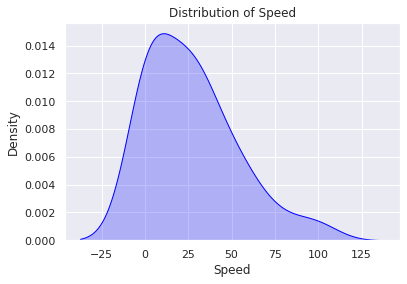

<Figure size 720x360 with 0 Axes>

In [ ]:
# histogram created from dataframe object "good_and_max_pow_characters" seen in an above cell(only contains good)
sns.set(style="darkgrid")
plt.title('Distribution of Speed')
# Large bandwidth
sns.kdeplot(good_and_max_pow_characters['Speed'], shade=True, bw=0.5, color="blue")

# Set the figure size
plt.figure(figsize=(10, 5))

plt.show()

A majority of characters have speed of 0-50. Only a small portion have speed over 75 or more.

Draw a histogram for combat of super villains having fig size 10,5 , provide combat in
histogram for only bad alignment super heroes ,title should be "distribution of
combat" , xlabel should be "combat"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


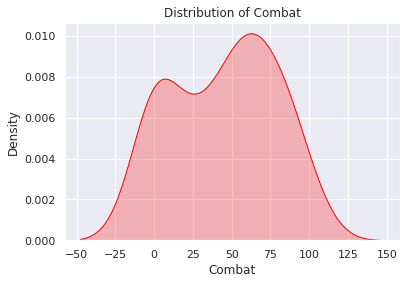

<Figure size 720x360 with 0 Axes>

In [ ]:
# histogram created from dataframe object "characters_bad_alignment" seen in an above cell(only contains bad)
sns.set(style="darkgrid")
plt.title('Distribution of Combat')
# Large bandwidth
sns.kdeplot(characters_bad_alignment['Combat'], shade=True, bw=0.5, color="red")

# Set the figure size
plt.figure(figsize=(10, 5))

plt.show()

A very small group have combat over 115. A huge majority have combat scores between 0-75.

Correlation Analysis

In [40]:
df.corr()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.565508,0.619845,0.683933,0.720550,0.783679,0.856352
Strength,0.565508,1.000000,0.640657,0.793649,0.639829,0.575045,0.824557
Speed,0.619845,0.640657,1.000000,0.704255,0.683467,0.594568,0.813902
Durability,0.683933,0.793649,0.704255,1.000000,0.756840,0.679583,0.907441
Power,0.720550,0.639829,0.683467,0.756840,1.000000,0.653452,0.873359
Combat,0.783679,0.575045,0.594568,0.679583,0.653452,1.000000,0.839966
Total,0.856352,0.824557,0.813902,0.907441,0.873359,0.839966,1.000000


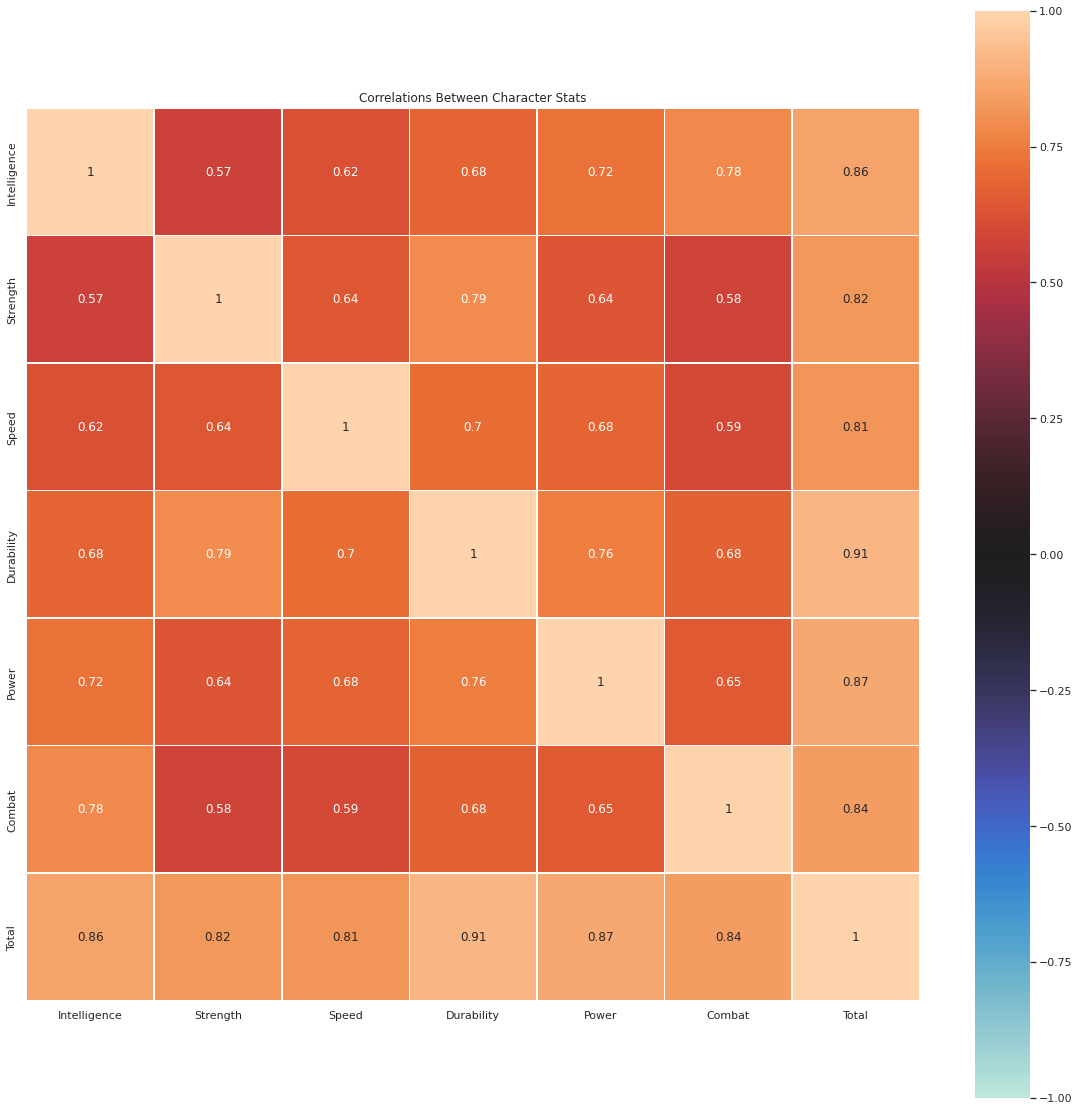

In [39]:
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0,
linewidth=.5,square=True, annot = True)
plt.title('Correlations Between Character Stats')
plt.show()

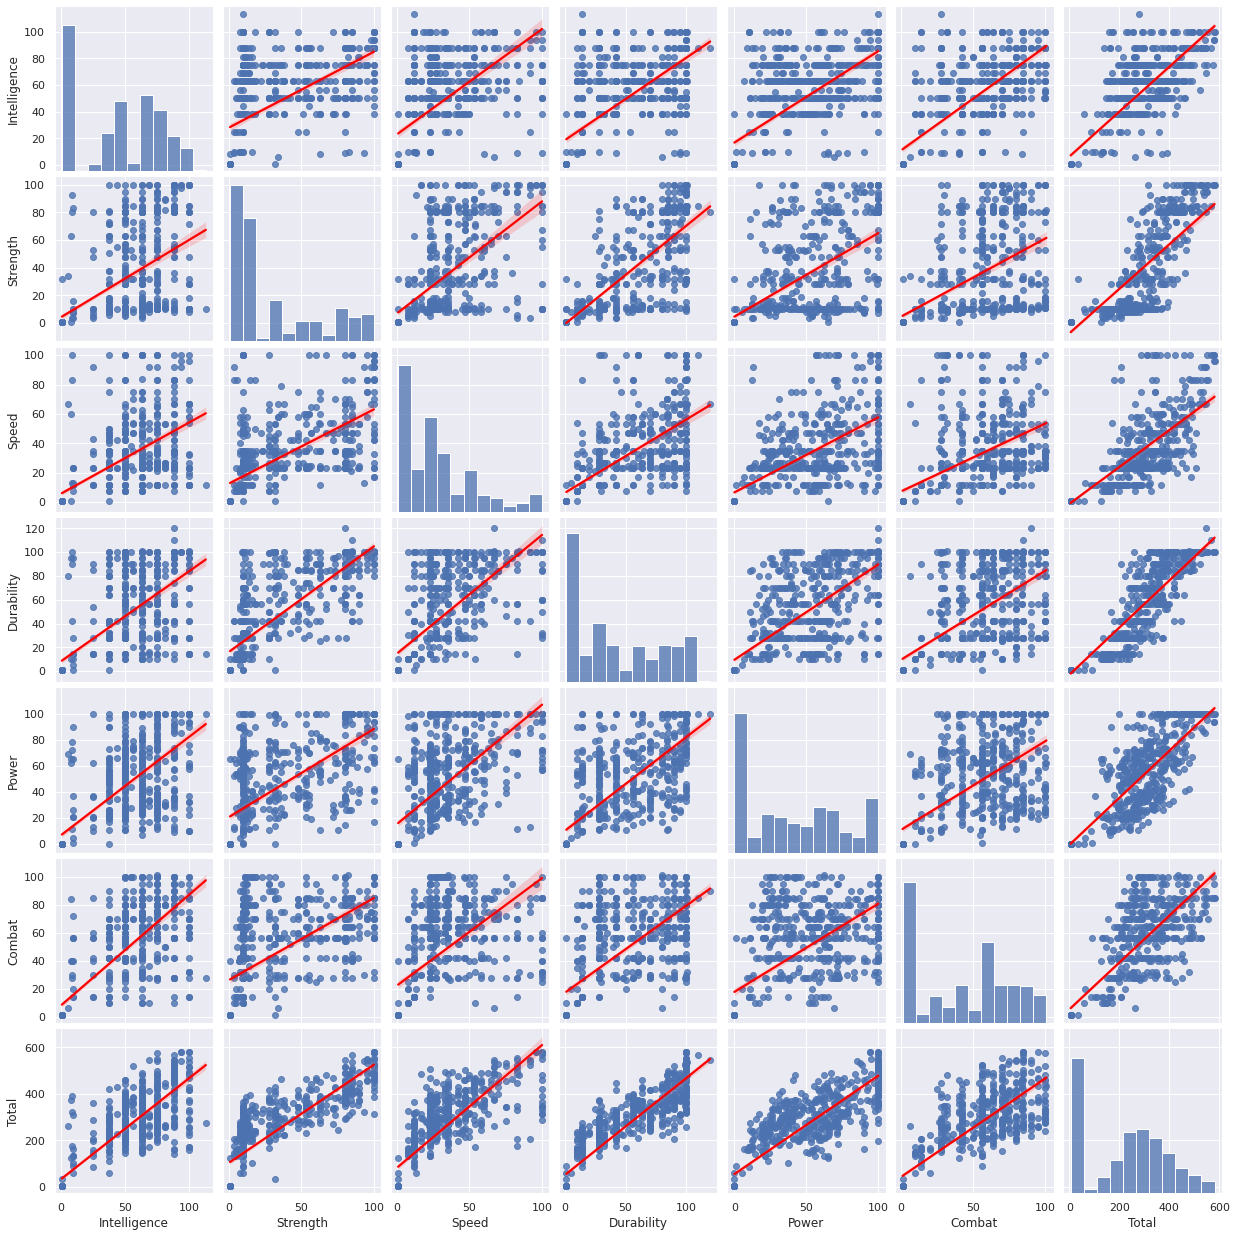

In [41]:
#seaborn pair-plot with red linear regression line
sns.pairplot(df, kind="reg", palette="Set2", plot_kws={'line_kws':{'color':'red'}})
plt.show()

Confirms findings that dataset's distributions/columns contain strong positive correlations with each other.

Further Density Ananlysis of Distributions

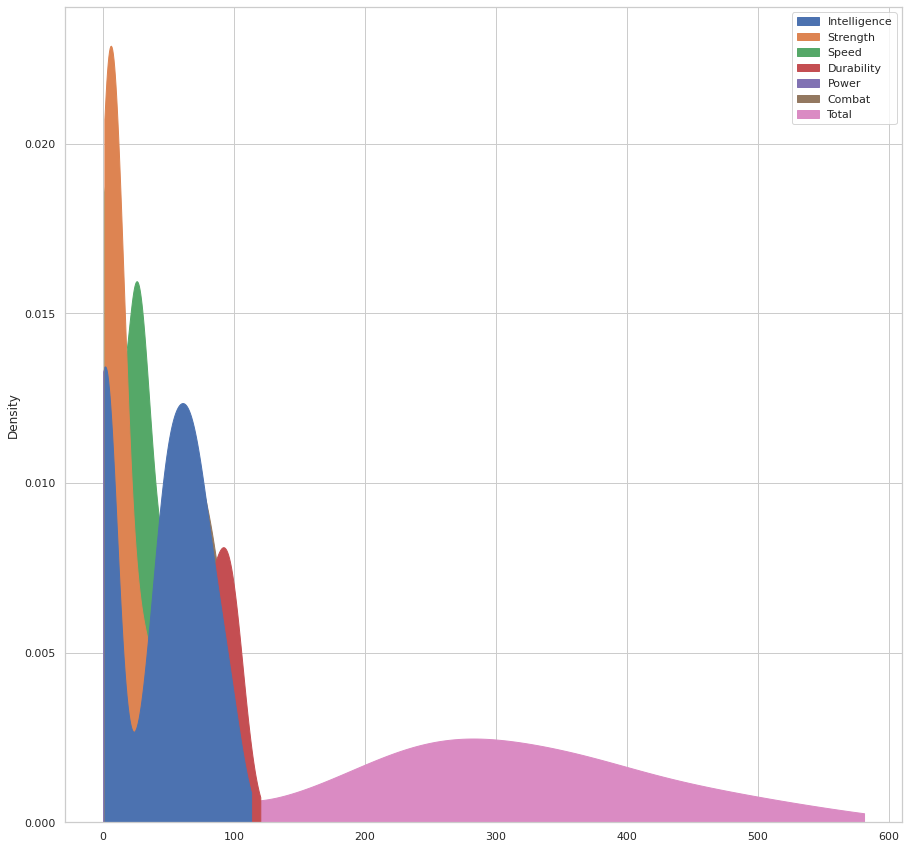

In [57]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

#set size of plot
plt.figure(figsize=(15,15))

# Without transparency
sns.kdeplot(data=df, cut=0, fill=True, common_norm=False, alpha=1)
plt.show()

Very few characters have Totals over 500. A majority have it 200-300.

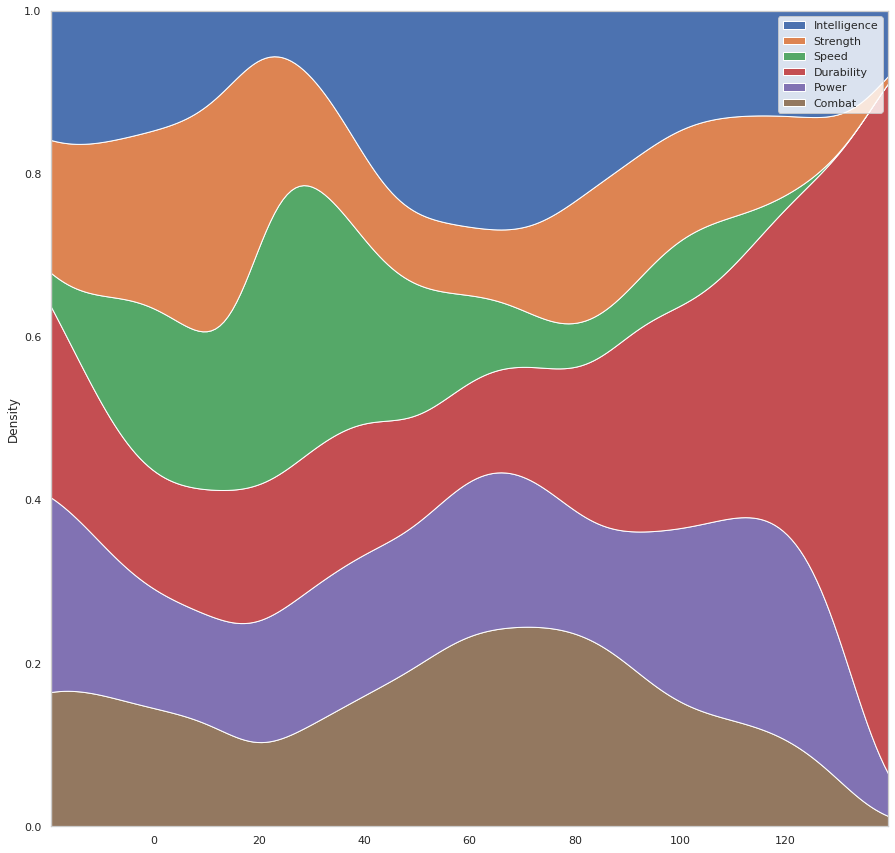

In [56]:
data = df.drop(['Total'], axis=1)

# set seaborn whitegrid theme
sns.set(style="whitegrid")

#set size of plot
plt.figure(figsize=(15,15))

# stacked density plot
sns.kdeplot(data=data, common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()


A most character stats range form -25 to 130. Nothing past that. 

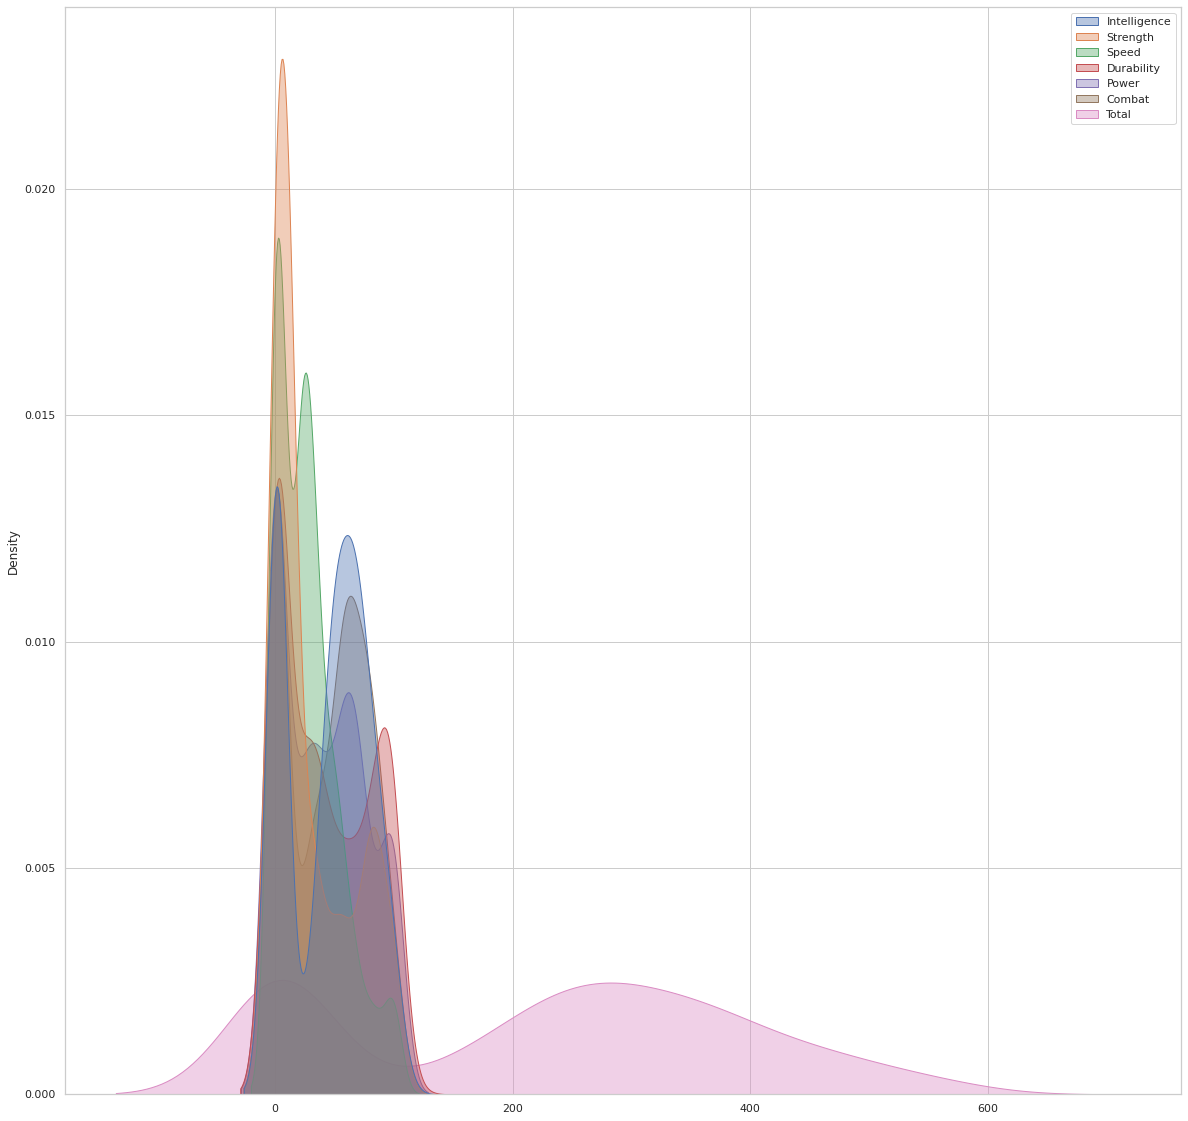

In [55]:
# With transparency
#set size of plot
plt.figure(figsize=(15,15))

sns.kdeplot(data=df, fill=True, common_norm=False, alpha=0.4)
plt.show()

Machine Learning: Unsupervised Learning Algorithims

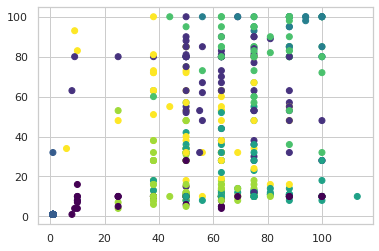

In [61]:

%matplotlib inline

data = df.drop(['Name', 'Alignment'], axis=1)

kmean_model = KMeans(init='k-means++')
kmean_model.fit(data)
predict = kmean_model.predict(data)

plt.scatter(df.iloc[:,2],df.iloc[:,3],c = predict,cmap = 'viridis')

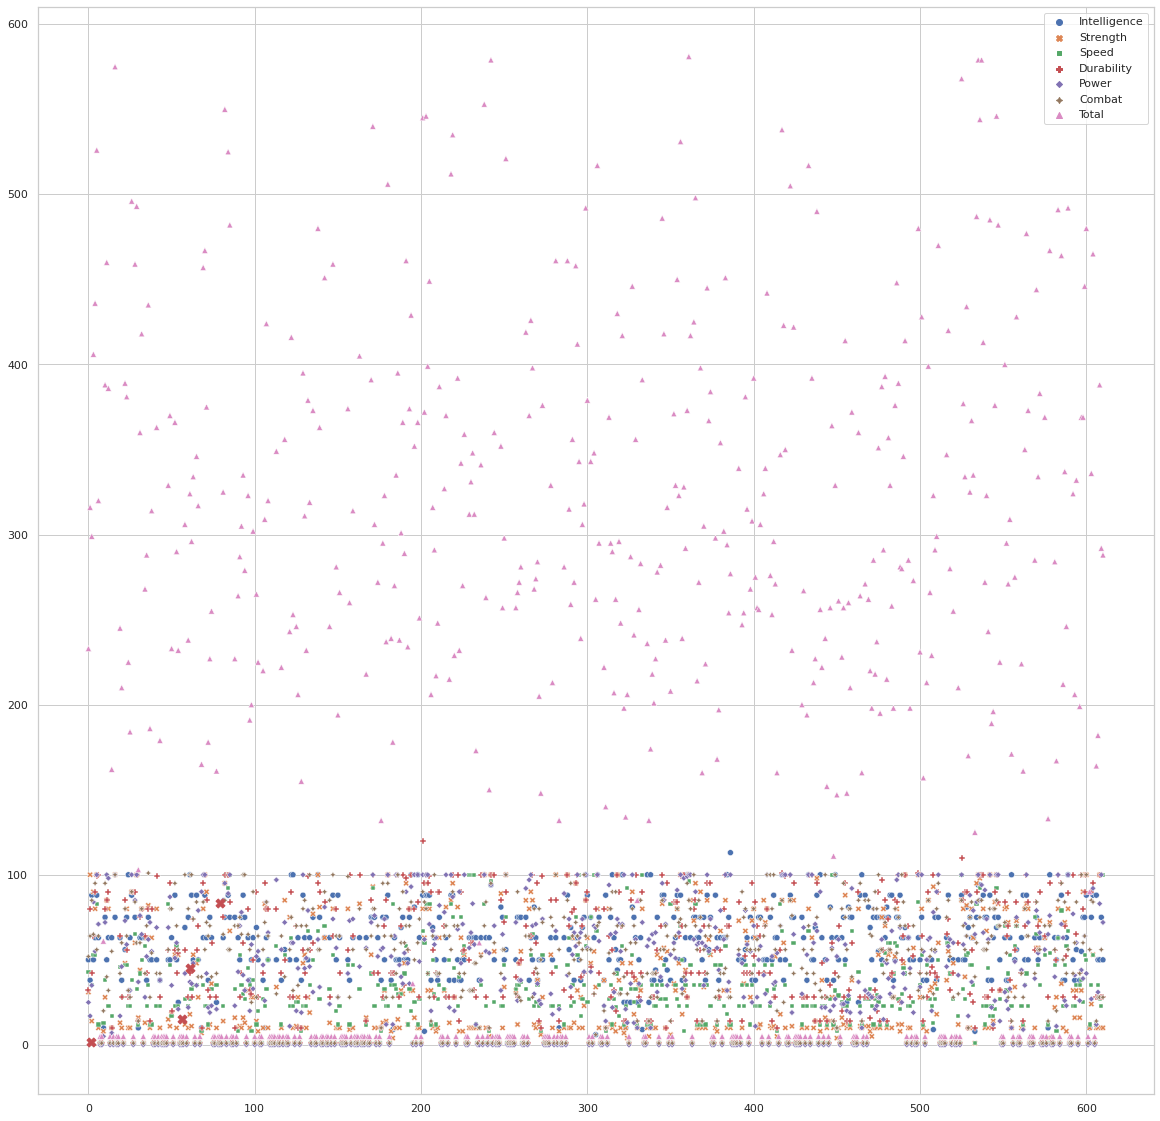

In [82]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data)

#set size of plot
plt.figure(figsize=(20,20))

sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80)
plt.legend()
plt.show()